In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('car_prices.csv.zip')

In [21]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [22]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [25]:
df.isna().sum(axis=1) > 1

0         False
1         False
2         False
3         False
4         False
          ...  
558832    False
558833    False
558834    False
558835    False
558836    False
Length: 558837, dtype: bool

The decision is made to drop the following columns:
vin - This is a unique indentifier and does not influence price predition
trim - Due to its high value of missing data
transmission - This column has an extremely high value of missing data (65352). All non-missing values also indicate the same type of transmission as "automatic". 

In [29]:
df.drop(columns = ['vin'], inplace = True)
df.drop(columns = ['trim'], inplace = True)
df.drop(columns = ['transmission'], inplace = True)

In [49]:
df = df.copy() 
df.update(df[['condition', 'odometer']].fillna(df[['condition', 'odometer']].mean()))
df.update(df[['color', 'interior']].fillna(df[['color', 'interior']].mode().iloc[0]))

In [51]:
df.isnull().sum()

year                0
make            10301
model           10399
body            13195
state               0
condition           0
odometer            0
color               0
interior            0
seller              0
mmr                38
sellingprice       12
saledate           12
car_age             0
dtype: int64

In [33]:
df['saledate'] = pd.to_datetime(df['saledate'], utc=True)
df['saledate'] = df['saledate'].dt.tz_localize(None)
df['saledate']

C:\Users\niosw\AppData\Local\Temp\ipykernel_23808\3694032006.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'], utc=True)


DateParseError: year 16500 is out of range: 16500, at position 2896

In [53]:
print(df.dtypes)

year              int64
make             object
model            object
body             object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
car_age           int64
dtype: object


In [55]:
print(df.describe())

                year      condition       odometer            mmr  \
count  558837.000000  558837.000000  558837.000000  558799.000000   
mean     2010.038927      30.672365   68320.017767   13769.377495   
std         3.966864      13.260332   53394.051633    9679.967174   
min      1982.000000       1.000000       1.000000      25.000000   
25%      2007.000000      24.000000   28375.000000    7100.000000   
50%      2012.000000      34.000000   52266.000000   12250.000000   
75%      2013.000000      41.000000   99103.000000   18300.000000   
max      2015.000000      49.000000  999999.000000  182000.000000   

        sellingprice        car_age  
count  558825.000000  558837.000000  
mean    13611.358810      14.961073  
std      9749.501628       3.966864  
min         1.000000      10.000000  
25%      6900.000000      12.000000  
50%     12100.000000      13.000000  
75%     18200.000000      18.000000  
max    230000.000000      43.000000  


In [39]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


C:\Users\niosw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


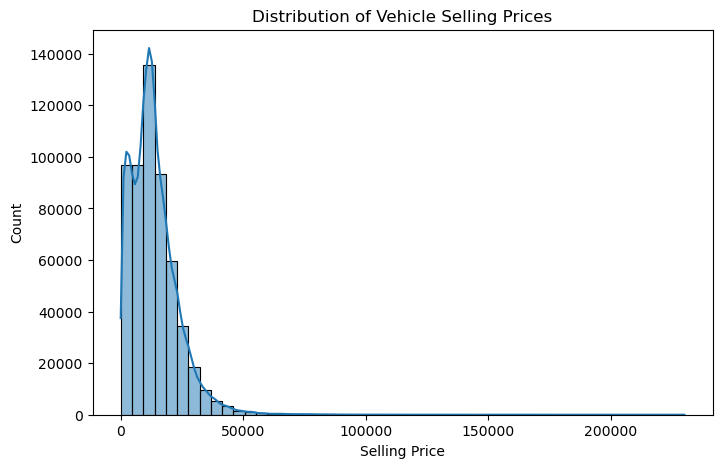

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(df['sellingprice'], bins=50, kde=True)
plt.title("Distribution of Vehicle Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.show()

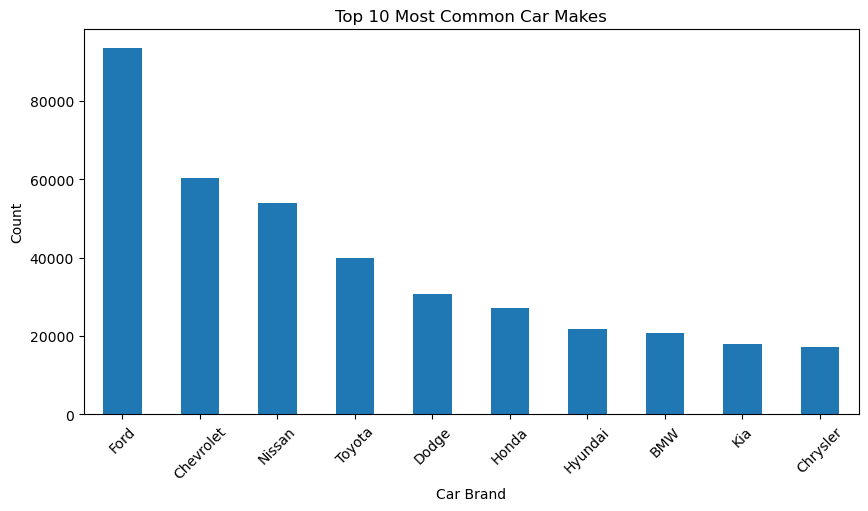

In [43]:
plt.figure(figsize=(10, 5))
df['make'].value_counts().nlargest(10).plot(kind='bar')
plt.title("Top 10 Most Common Car Makes")
plt.ylabel("Count")
plt.xlabel("Car Brand")
plt.xticks(rotation=45)
plt.show()

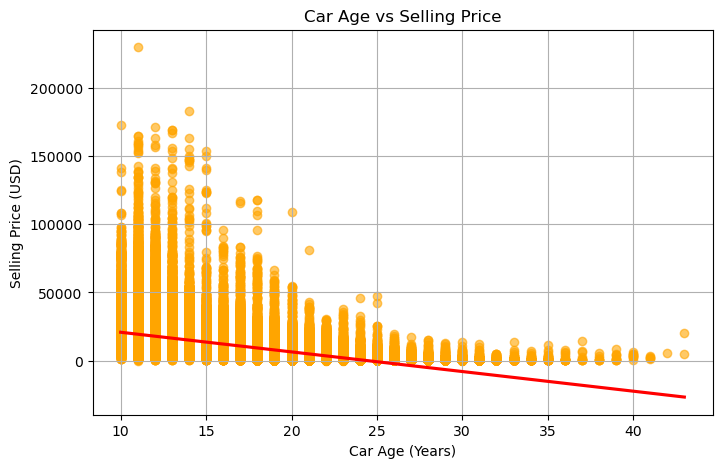

In [47]:
df['car_age'] = 2025 - df['year']
plt.figure(figsize=(8, 5))
sns.regplot(x=df['car_age'], y=df['sellingprice'], scatter_kws={'alpha': 0.6, 'color': 'orange'}, line_kws={'color': 'red'})
plt.title("Car Age vs Selling Price")
plt.xlabel("Car Age (Years)")
plt.ylabel("Selling Price (USD)")
plt.grid(True)
plt.show()